<a href="https://colab.research.google.com/github/MarcellinusRyan20/SalesForecasting/blob/main/Telecom_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries and Data

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score, classification_report
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

## Data Understanding and Preprocessing

In [3]:
# Get to know about the data
df_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [4]:
df_test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    object 
 5   voice_mail_plan                750 non-null    object 
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    int64  
 12  total_eve_charge               750 non-null    flo

In [7]:
df_train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [8]:
df_test.describe()

,id,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,750.00000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,375.50000,100.385333,8.454667,180.454933,100.721333,30.677920,203.258267,100.273333,17.277080,199.619467,100.370667,8.982827,10.294133,4.485333,2.779933,1.634667
std,216.65064,39.699029,14.123712,53.258337,19.718539,9.053756,52.185471,19.367535,4.435638,51.531351,19.185238,2.318920,2.770340,2.421901,0.747704,1.276207
min,1.00000,1.000000,0.000000,12.500000,39.000000,2.130000,31.200000,37.000000,2.650000,50.900000,12.000000,2.290000,0.000000,0.000000,0.000000,0.000000
25%,188.25000,74.000000,0.000000,146.625000,88.000000,24.925000,166.800000,87.000000,14.177500,164.475000,88.000000,7.402500,8.525000,3.000000,2.305000,1.000000
50%,375.50000,101.000000,0.000000,178.200000,101.000000,30.295000,203.350000,101.000000,17.285000,199.450000,100.500000,8.975000,10.300000,4.000000,2.780000,1.000000
75%,562.75000,126.000000,21.000000,215.975000,114.000000,36.715000,235.975000,113.000000,20.057500,234.800000,113.000000,10.565000,12.100000,6.000000,3.270000,2.000000
max,750.00000,238.000000,51.000000,350.800000,163.000000,59.640000,363.700000,164.000000,30.910000,364.300000,168.000000,16.390000,18.900000,19.000000,5.100000,6.000000


In [9]:
# Check for any null value
print("Are there any null value in train data?", df_train.isnull().any().any())
print("Are there any null value in test_data?", df_test.isnull().any().any())

# We can conclude that there is no null value in the data sets

Are there any null value in train data? False
Are there any null value in test_data? False


In [10]:
# Count the occurences of each state in train data
state_counts = {}
for state in df_train['state']:
  if state in state_counts:
    state_counts[state] += 1
  else:
    state_counts[state] = 1

for state, count in state_counts.items():
  print(state,"-",count)

# From here we can conclude that the number of state is not equal
# From now on the focus is to train data

OH - 95
NJ - 96
OK - 78
MA - 89
MO - 80
LA - 69
WV - 139
IN - 83
RI - 87
IA - 62
MT - 80
NY - 96
ID - 106
VA - 100
TX - 98
FL - 76
CO - 80
AZ - 77
SC - 72
WY - 95
HI - 77
NH - 78
AK - 61
GA - 64
MD - 86
AR - 71
WI - 94
OR - 99
MI - 87
DE - 80
UT - 97
CA - 39
SD - 75
NC - 80
WA - 80
MN - 108
NM - 78
NV - 83
DC - 72
VT - 86
KY - 85
ME - 89
MS - 82
AL - 101
NE - 73
KS - 87
TN - 79
IL - 79
PA - 67
CT - 88
ND - 67


In [11]:
# Change binary variable to binary value 0/1 for train data
replaced_columns = ['international_plan', 'voice_mail_plan', 'churn']
df_train[replaced_columns] = df_train[replaced_columns].replace({'yes':1,'no':0})
print(df_train)

     state  account_length      area_code  international_plan  \
0       OH             107  area_code_415                   0   
1       NJ             137  area_code_415                   0   
2       OH              84  area_code_408                   1   
3       OK              75  area_code_415                   1   
4       MA             121  area_code_510                   0   
...    ...             ...            ...                 ...   
4245    MT              83  area_code_415                   0   
4246    WV              73  area_code_408                   0   
4247    NC              75  area_code_408                   0   
4248    HI              50  area_code_408                   0   
4249    VT              86  area_code_415                   0   

      voice_mail_plan  number_vmail_messages  total_day_minutes  \
0                   1                     26              161.6   
1                   0                      0              243.4   
2                 

## Exploratory Data Analysis

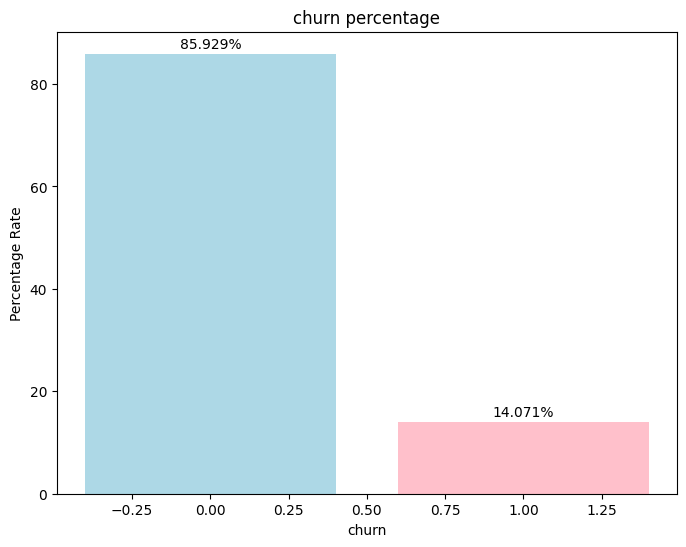

In [12]:
# Churn data visualisation
def percentage_plot(df, column_name):
  percentage_count = (df[column_name].value_counts(normalize=True)*100).round(3)
  plt.figure(figsize=(8,6))
  plt.bar(percentage_count.index, percentage_count.values, color=['lightblue','pink','lightgreen'])

# Add annotations
  for i,value in enumerate (percentage_count.values):
    plt.text(i, value + 1, f"{value}%", ha='center')

# Add labels
  plt.title(str(column_name) + ' percentage')
  plt.xlabel(str(column_name))
  plt.ylabel('Percentage Rate')
  plt.show()

percentage_plot(df_train,'churn')

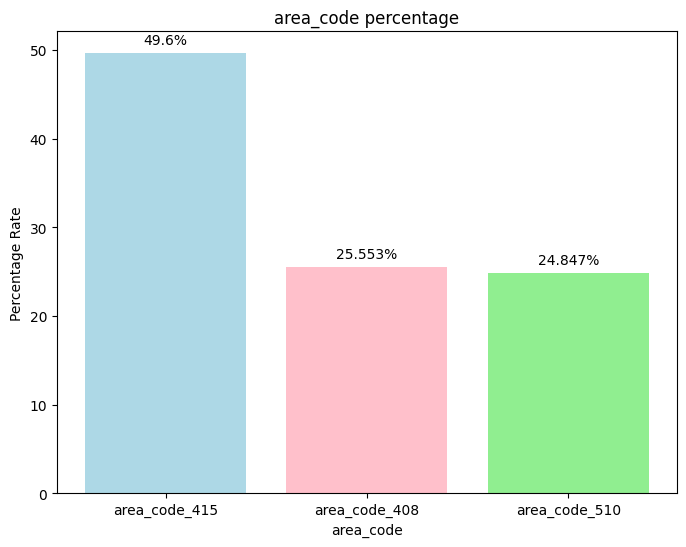

In [13]:
percentage_plot(df_train,'area_code')

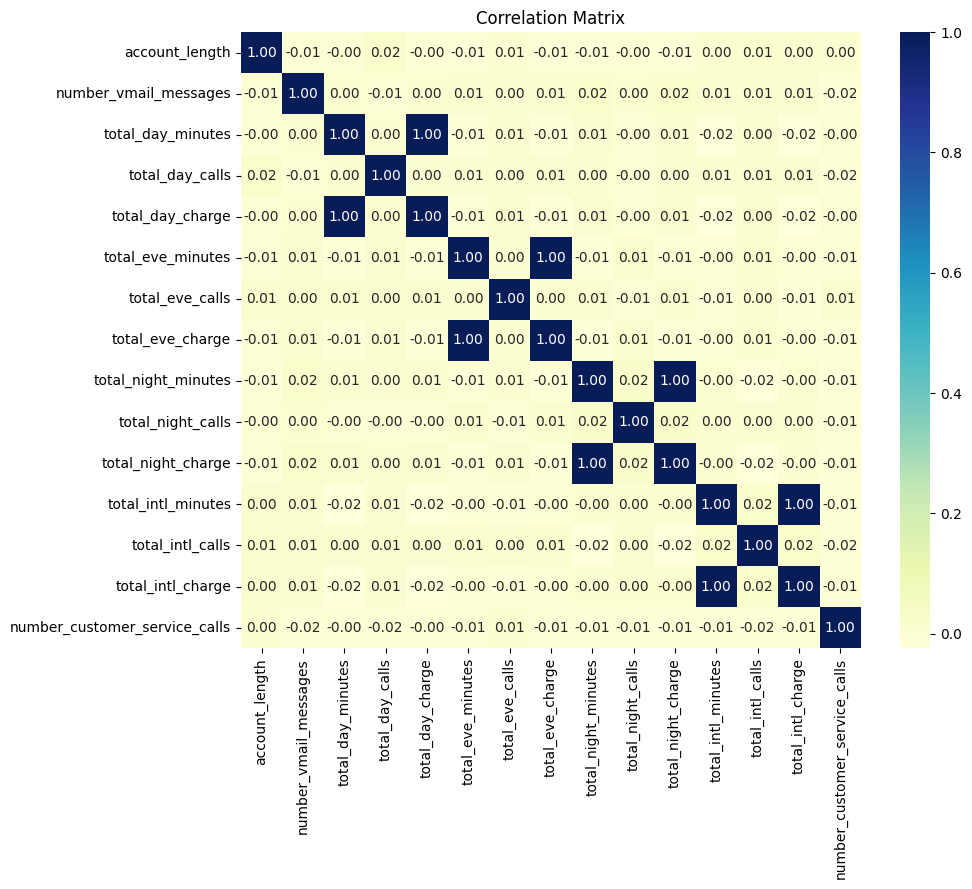

In [14]:
# Creating a correlation matrix by dropping binary variables
cols_to_drop = ['state','area_code','international_plan','voice_mail_plan','churn']
corr_matrix = df_train.drop(columns=cols_to_drop,axis=1).corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# From the correlation matrix, it can be concluded that the charges and minutes call have a very high correlation
# It seems that charges are calculated based on the minutes call
# Therefore, this variables can be dropped as they do not add any information.
df_train.drop(['total_day_charge','total_eve_charge','total_night_charge','total_intl_charge'], axis=1, inplace=True)

In [15]:
# Create a histograms in subplot
# Create a blank list to get the features that wanted to be visualised
features = []

# Filling the blank list with the features that are not in the cols_to_drop
for col in df_train.columns:
  if col not in cols_to_drop:
    features.append(col)

# Calculating the number of rows and columns for subplot
n_features = len(features)
n_rows = (n_features-1) // 4 + 1
n_cols = min(n_features, 4)

# Create a function for plotting features
def plot_features(df, features, n_rows, n_cols, plot_type, figsize=(20,10)):
  n_features = len(features)
  fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=figsize)

  # Calculating the number of rows and columns for subplot
  for i, feature in enumerate(features):
    row = i // 4
    col = i % 4

    if plot_type == 'histogram':
      df[feature].hist(ax=axes[row, col])
    elif plot_type == 'boxplot':
      colors=['lightblue','pink']
      for j, category in enumerate(df['churn'].unique()):
        sns.boxplot(data=df[df['churn'] == category], x='churn', y=feature, ax=axes[row, col], color=colors[j])
        axes[row, col].set_xlabel('churn')
    axes[row, col].set_ylabel(feature)
    axes[row, col].set_title(feature)

  # Remove empty subplot
  for i in range(n_features, n_rows*n_cols):
    fig.delaxes(axes.flatten()[i])

  plt.tight_layout()
  plt.show()

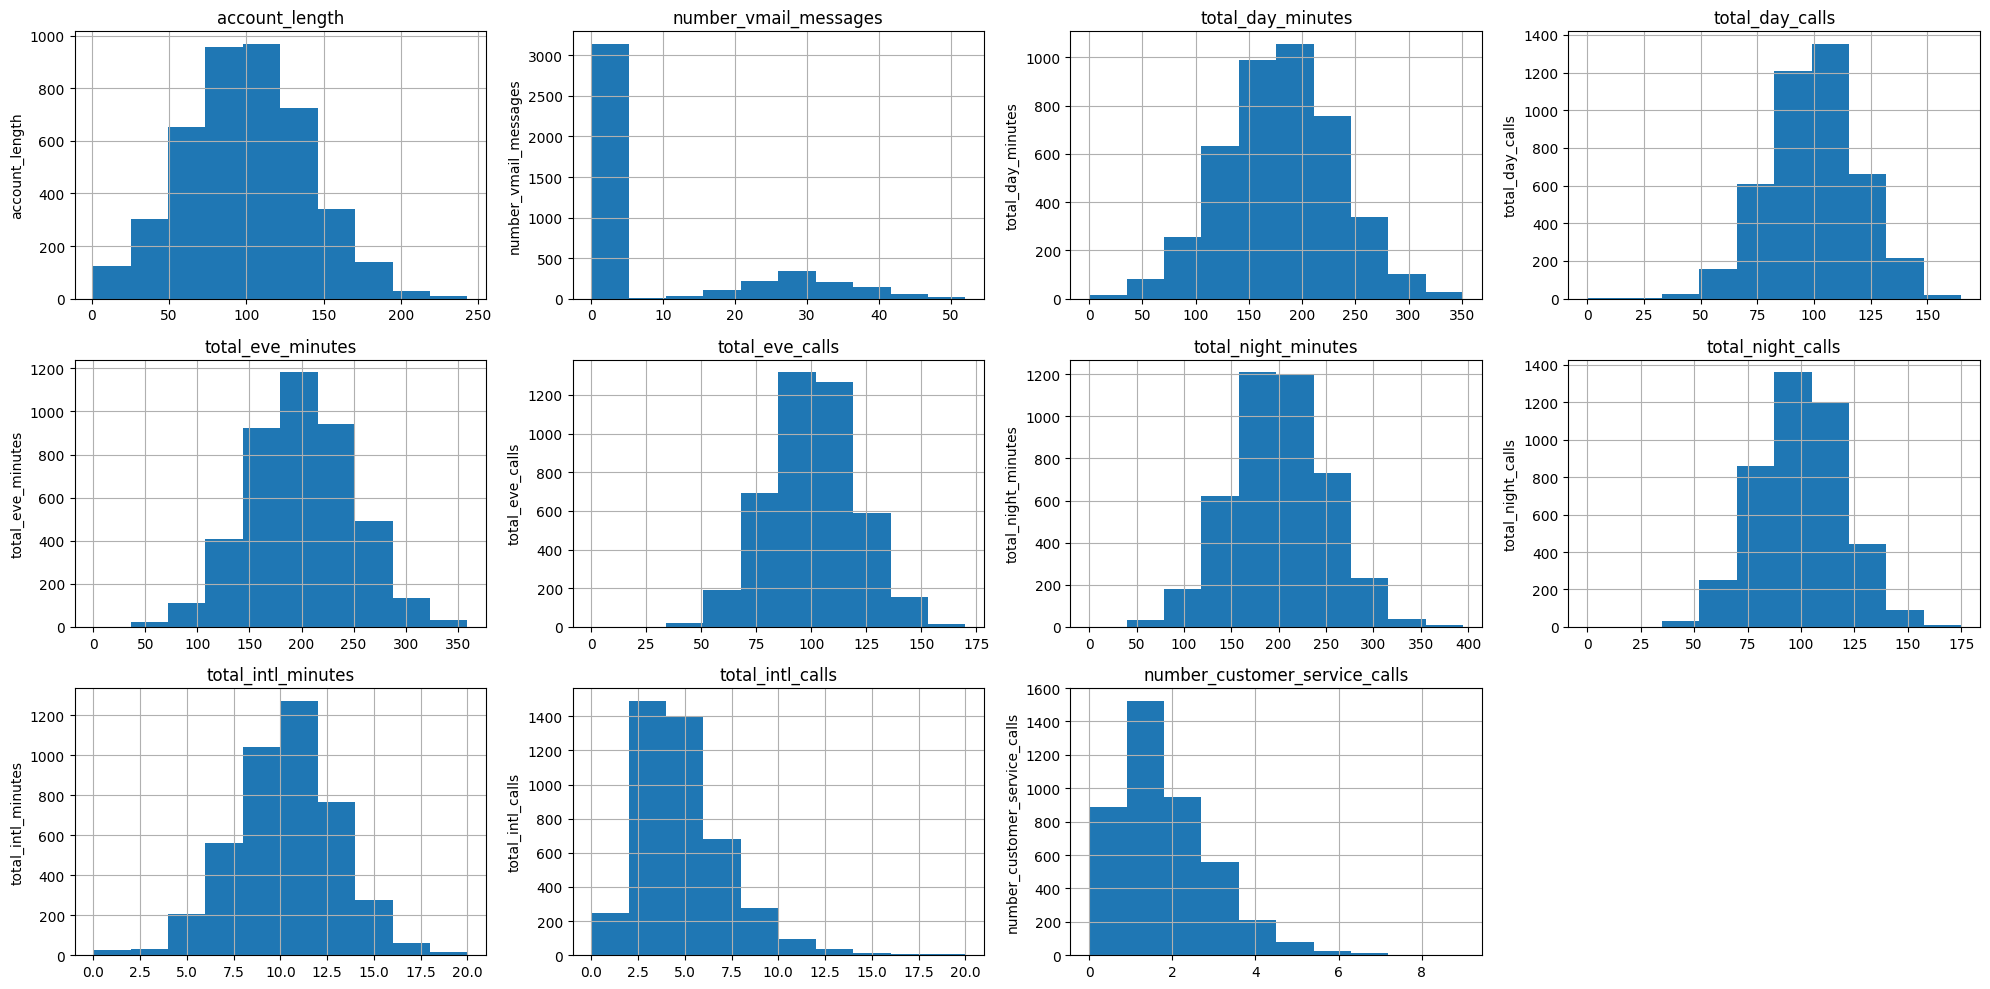

In [16]:
# Create histogram for features
plot_features(df_train, features, n_rows, n_cols, plot_type='histogram')

# Features are normally distributed, except number_vmail_messages,
# total_intl_calls, and number_customer_service_calls (left-skewed)

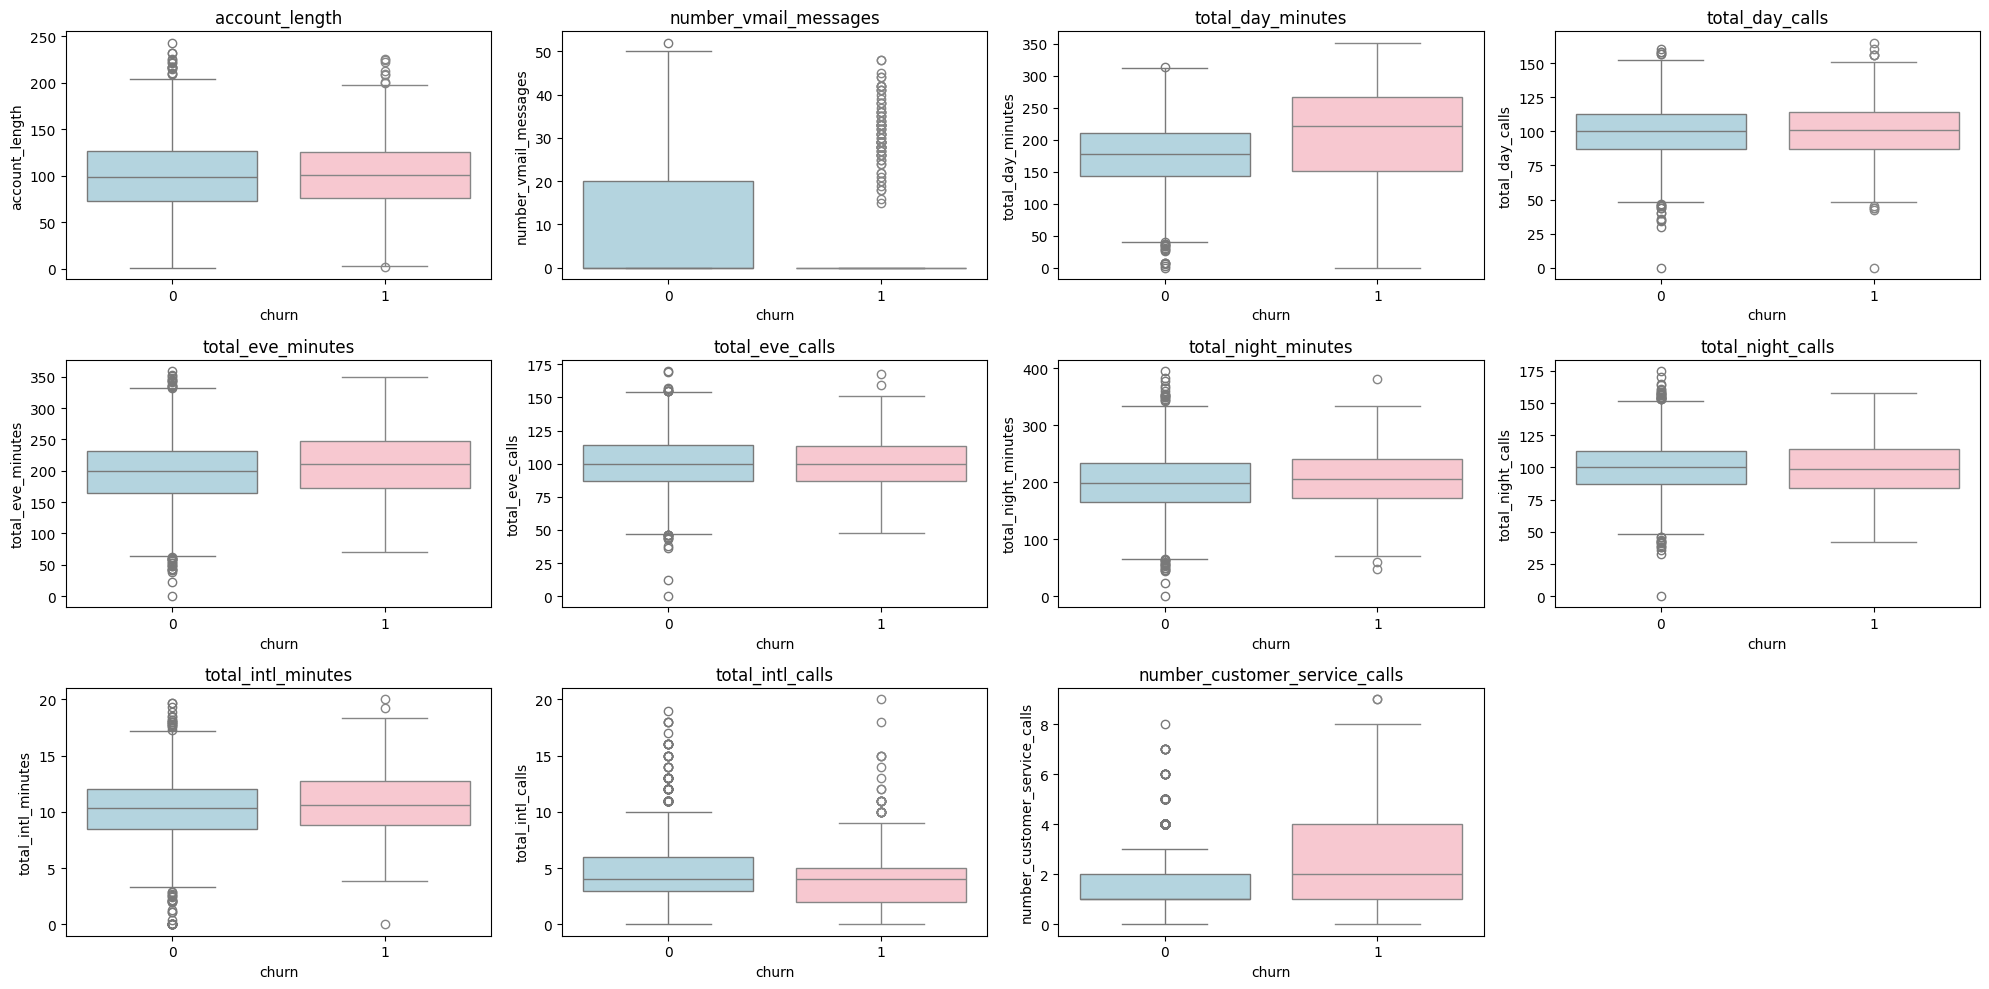

In [17]:
# Create boxplot for features and churn
plot_features(df_train, features, n_rows, n_cols, plot_type='boxplot')

# Most boxplots between churned customer and not are identical except for:
# number_vmail_messages: it seems that churned customer is less using voice mall messages
# total_day_minutes: churned customer spent more minutes on call
# number_customer_service_calls: churned customer often having a call with customer service

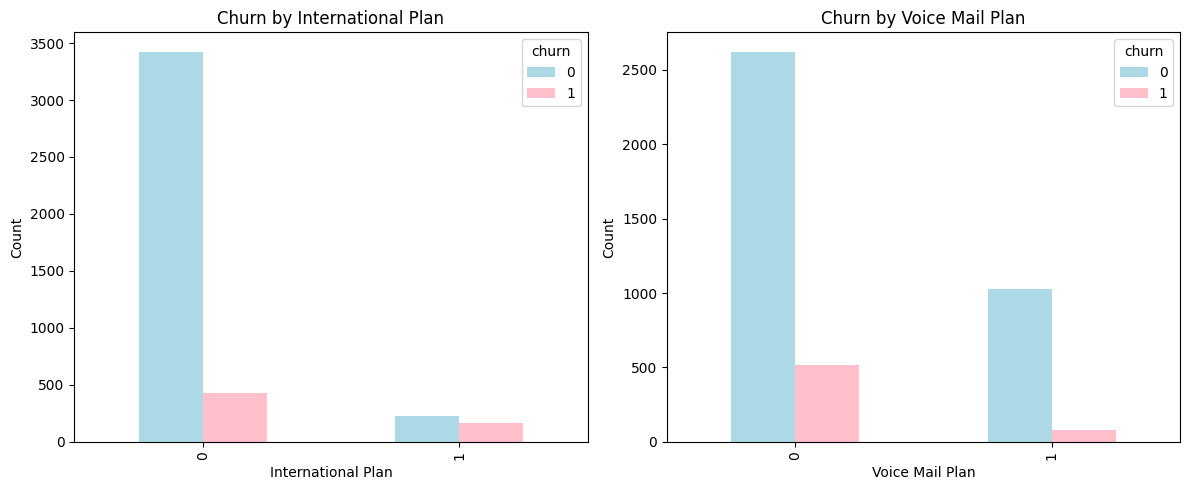

In [18]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Countplot for 'international_plan'
df_train.groupby(['international_plan', 'churn']).size().unstack().plot(kind='bar', ax=axes[0],color=['lightblue','pink'])
axes[0].set_xlabel('International Plan')
axes[0].set_ylabel('Count')
axes[0].set_title('Churn by International Plan')

# Countplot for 'voice_mail_plan'
df_train.groupby(['voice_mail_plan', 'churn']).size().unstack().plot(kind='bar', ax=axes[1],color=['lightblue','pink'])
axes[1].set_xlabel('Voice Mail Plan')
axes[1].set_ylabel('Count')
axes[1].set_title('Churn by Voice Mail Plan')

plt.tight_layout()
plt.show()

In [19]:
# From the chart above, it can be concluded that when the international plan is activated,
# the number for customer churn is higher
# To validate this conclusion, let's calculate the proportion of customer that churned when
# they activated the international plan
international_plan_customers = df_train[df_train['international_plan'] ==1]
churned_international_plan_customers = international_plan_customers[international_plan_customers['churn'] ==1]
percentage_churned_international_plan_customers = len(churned_international_plan_customers) / len(international_plan_customers)*100
print("Percentage of customers who churned when they activated the international plan: {:.3f}%".format(percentage_churned_international_plan_customers))


Percentage of customers who churned when they activated the international plan: 42.172%


Three states with the highest churn percentage among states are: ['NJ', 'CA', 'WA']


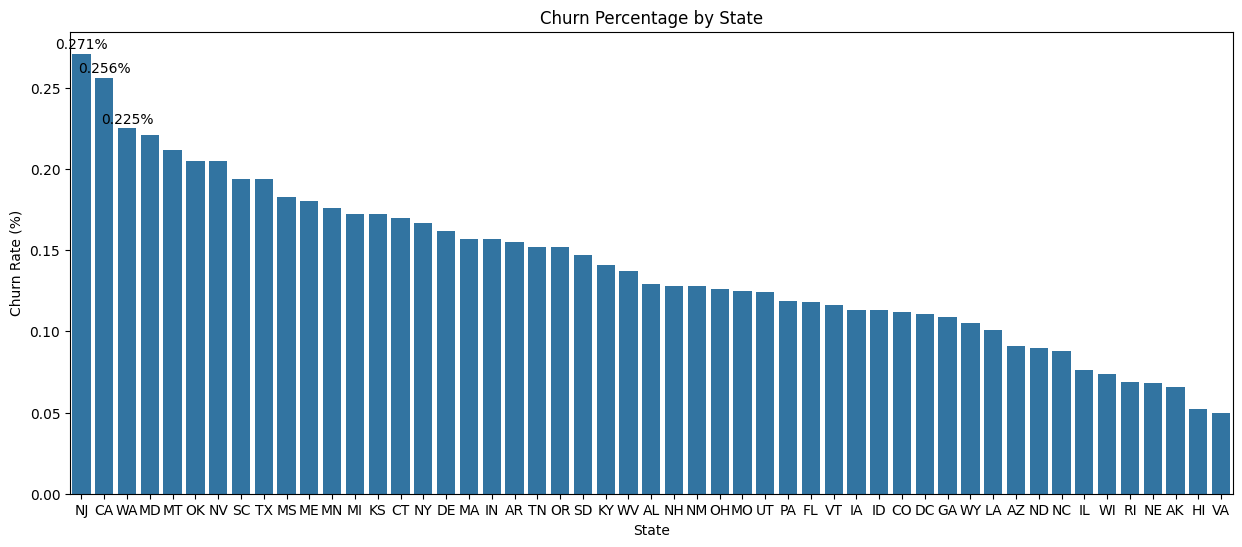

In [61]:
# Create a column chart for churn percentage among states
churn_state = df_train.groupby(['state'])['churn'].mean().round(decimals=3)
churn_state_df = churn_state.reset_index()
# Sort the DataFrame by churn rate in descending order
churn_state_df_sorted = churn_state_df.sort_values(by='churn', ascending=False)
top_3_states = churn_state_df_sorted['state'].tolist()[:3]
print('Three states with the highest churn percentage among states are:', top_3_states)

plt.figure(figsize=(15, 6))
sns.barplot(data=churn_state_df_sorted, x='state', y='churn')
# Add annotations for the top 3 highest churn rates
for i, (index, row) in enumerate(churn_state_df_sorted.iloc[:3].iterrows()):
  if row['state'] in top_3_states:
    plt.text(i, row['churn'] + 0.01, f"{row['churn']:.3f}%", ha='center', va='top')

# Set labels and title
plt.xlabel('State')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Percentage by State')

# Show the plot
plt.show()


## Modelling

In [21]:
# Get the numerical values
cols_to_scale = []
for col in df_train:
  if col not in cols_to_drop:
    cols_to_scale.append(col)

# Scaled the numerical values
scaler = StandardScaler()
scaled_cols = scaler.fit_transform(df_train[cols_to_scale])
df_train_scaled = pd.DataFrame(scaled_cols, columns=cols_to_scale)
df_train_scaled[cols_to_drop]=df_train[cols_to_drop]

# Remove 'state' and 'area_code' columns
df_train_scaled.drop(columns=['state', 'area_code'], inplace=True)
print(df_train_scaled)

      account_length  number_vmail_messages  total_day_minutes  \
0           0.170399               1.366857          -0.345510   
1           0.926186              -0.567911           1.169136   
2          -0.409038              -0.567911           2.206058   
3          -0.635774              -0.567911          -0.251076   
4           0.523099               1.218029           0.702522   
...              ...                    ...                ...   
4245       -0.434231              -0.567911           0.148880   
4246       -0.686160              -0.567911          -0.043691   
4247       -0.635774              -0.567911          -0.177010   
4248       -1.265596               2.408655           1.026560   
4249       -0.358652               1.962170          -0.941739   

      total_day_calls  total_eve_minutes  total_eve_calls  \
0            1.163449          -0.093025         0.141841   
1            0.710014          -1.571820         0.493490   
2           -1.456398   

In [22]:
# Create x and y variable
X = df_train_scaled.drop('churn', axis=1)
y = df_train_scaled['churn']

In [23]:
# Split df_train_scaled to train and test randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3400, 13) (850, 13) (3400,) (850,)


In [24]:
# Initialize classifiers
knn_classifier = KNeighborsClassifier()
logistic_regression = LogisticRegression()
random_forest = RandomForestClassifier()
svm_classifier = SVC()
decision_tree = DecisionTreeClassifier()
xgboost_classifier = XGBClassifier()

# Train the classifiers
knn_classifier.fit(X_train, y_train)
logistic_regression.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
xgboost_classifier.fit(X_train, y_train)

# Make predictions on the test set
knn_predictions = knn_classifier.predict(X_test)
logistic_regression_predictions = logistic_regression.predict(X_test)
random_forest_predictions = random_forest.predict(X_test)
svm_predictions = svm_classifier.predict(X_test)
decision_tree_predictions = decision_tree.predict(X_test)
xgboost_predictions = xgboost_classifier.predict(X_test)

# Evaluate the models
models_pred = {
    'KNN': knn_predictions,
    'Logistic Regression': logistic_regression_predictions,
    'Random Forest': random_forest_predictions,
    'SVM': svm_predictions,
    'Decision Tree': decision_tree_predictions,
    'XGBoost': xgboost_predictions
}

# Store the results in a list of dictionaries
train_test_split_results = []

for name, predictions in models_pred.items():
    result = {'Model': name}
    accuracy_train_test_split = accuracy_score(y_test, predictions)
    result['TrainTestSplit Accuracy'] = accuracy_train_test_split
    train_test_split_results.append(result)

train_test_split_results_df = pd.DataFrame(train_test_split_results)
print(train_test_split_results_df)

                 Model  TrainTestSplit Accuracy
0                  KNN                 0.876471
1  Logistic Regression                 0.863529
2        Random Forest                 0.951765
3                  SVM                 0.907059
4        Decision Tree                 0.910588
5              XGBoost                 0.965882


In [26]:
# Leave-One-Out Cross Validation
cv = LeaveOneOut()

knn_model = KNeighborsClassifier()
logistic_regression_model = LogisticRegression()
random_forest_model = RandomForestClassifier()
svm_model = SVC()
decision_tree_model = DecisionTreeClassifier()
xgboost_model = XGBClassifier()

models = {
    'KNN': knn_model,
    'Logistic Regression': logistic_regression_model,
    'Random Forest': random_forest_model,
    'SVM': svm_model,
    'Decision Tree': decision_tree_model,
    'XGBoost': xgboost_model
}

loo_results = []

# Evaluate each model
for name, model in models.items():
  scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=2)
  mean_accuracy = np.mean(scores)
  result = {'Model': name, 'LeaveOneOut Accuracy': mean_accuracy}
  loo_results.append(result)

loo_results_df = pd.DataFrame(loo_results)
print(loo_results_df)

                 Model  LeaveOneOut Accuracy
0                  KNN              0.887765
1  Logistic Regression              0.865882
2        Random Forest              0.956235
3                  SVM              0.920000
4        Decision Tree              0.916000
5              XGBoost              0.959529


In [32]:
# K-Fold Cross Validation
n_splits_values = [3, 5, 10]

cross_val_results = []

# Iterate over each model
for name, model in models.items():
    # Store the mean accuracy for each n_splits
    accuracies_n = []
    # Iterate over each value of n_splits
    for n_splits in n_splits_values:
        kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
        scores = cross_val_score(model, X, y, scoring='accuracy', cv=kf, n_jobs=2)
        mean_accuracy = np.mean(scores)
        accuracies_n.append(mean_accuracy)
    result = {'Model': name}
    for i, n_splits in enumerate(n_splits_values):
        result[f'cross_valn_splits_{n_splits}'] = accuracies_n[i]
    cross_val_results.append(result)

cross_val_results_df = pd.DataFrame(cross_val_results)
print(cross_val_results_df)

                 Model  cross_valn_splits_3  cross_valn_splits_5  \
0                  KNN             0.883062             0.883765   
1  Logistic Regression             0.867532             0.864941   
2        Random Forest             0.954352             0.955059   
3                  SVM             0.911767             0.913412   
4        Decision Tree             0.917884             0.917882   
5              XGBoost             0.958353             0.961882   

   cross_valn_splits_10  
0              0.885412  
1              0.865176  
2              0.956000  
3              0.915765  
4              0.918353  
5              0.960000  


In [33]:
# Define the number of splits for stratified k-fold cross-validation
n_splits_values = [3, 5, 10]
stratified_results = []
# Iterate over each model
for name, model in models.items():
    # Store the mean accuracy for each n_splits
    strat_accuracies_n = []
    # Iterate over each value of n_splits
    for n_splits in n_splits_values:
        skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
        scores = cross_val_score(model, X, y, scoring='accuracy', cv=skf, n_jobs=-1)
        mean_accuracy = np.mean(scores)
        strat_accuracies_n.append(mean_accuracy)
    result = {'Model': name}
    for i, n_splits in enumerate(n_splits_values):
        result[f'stratified_n_splits_{n_splits}'] = strat_accuracies_n[i]
    stratified_results.append(result)

stratified_results_df = pd.DataFrame(stratified_results)
print(stratified_results_df)

                 Model  stratified_n_splits_3  stratified_n_splits_5  \
0                  KNN               0.887293               0.885882   
1  Logistic Regression               0.864942               0.866118   
2        Random Forest               0.950116               0.953412   
3                  SVM               0.912941               0.915529   
4        Decision Tree               0.915059               0.913882   
5              XGBoost               0.956941               0.957176   

   stratified_n_splits_10  
0                0.888706  
1                0.865412  
2                0.955765  
3                0.915765  
4                0.918588  
5                0.956706  


In [72]:
# Concatenate the 'Model' columns separately
model_column = pd.concat([train_test_split_results_df['Model'],
                          loo_results_df['Model'],
                          cross_val_results_df['Model'],
                          stratified_results_df['Model']], axis=0, ignore_index=True)

# Concatenate the rest of the dataframes
combined_results_df = pd.concat([model_column,
                                 train_test_split_results_df.drop(columns='Model'),
                                 loo_results_df.drop(columns='Model'),
                                 cross_val_results_df.drop(columns='Model'),
                                 stratified_results_df.drop(columns='Model')],
                                axis=1)
combined_results_df = combined_results_df.iloc[:6,:]
# Print the combined DataFrame
print(combined_results_df)

                 Model  TrainTestSplit Accuracy  LeaveOneOut Accuracy  \
0                  KNN                 0.876471              0.887765   
1  Logistic Regression                 0.863529              0.865882   
2        Random Forest                 0.951765              0.956235   
3                  SVM                 0.907059              0.920000   
4        Decision Tree                 0.910588              0.916000   
5              XGBoost                 0.965882              0.959529   

   cross_valn_splits_3  cross_valn_splits_5  cross_valn_splits_10  \
0             0.883062             0.883765              0.885412   
1             0.867532             0.864941              0.865176   
2             0.954352             0.955059              0.956000   
3             0.911767             0.913412              0.915765   
4             0.917884             0.917882              0.918353   
5             0.958353             0.961882              0.960000   

   s

In [96]:
# Get the best accuracy across several models and training methods
numerical_columns = combined_results_df.select_dtypes(include=np.number)
# Get the maximum accuracy score
best_accuracy = numerical_columns.max().max()

# Find the column (training method) with the maximum accuracy
for col in combined_results_df.columns:
    if combined_results_df[col].max() == best_accuracy:
        best_training_method = col
        break

# Get the model corresponding to the maximum accuracy
best_model_name = combined_results_df.loc[combined_results_df[best_training_method].idxmax(), 'Model']
print('The best accuracy score is:', best_accuracy)
print('It can be obtained using the following model:', best_model_name, "with", best_training_method)
print('Confusion Matrix')
print(confusion_matrix(y_test, xgboost_predictions))

The best accuracy score is: 0.9658823529411765
It can be obtained using the following model: XGBoost with TrainTestSplit Accuracy
Confusion Matrix
[[716   5]
 [ 24 105]]


In [86]:
# Check on the feature importance by best model
feature_importances = xgboost_classifier.feature_importances_
feature_importances_df = pd.DataFrame({'features': list(X_train), 'feature_importances': feature_importances})
feature_importances_df = feature_importances_df.sort_values('feature_importances', ascending=False)
print(feature_importances_df)

                         features  feature_importances
11             international_plan             0.195019
10  number_customer_service_calls             0.175613
1           number_vmail_messages             0.171816
2               total_day_minutes             0.108484
9                total_intl_calls             0.079890
4               total_eve_minutes             0.061149
8              total_intl_minutes             0.059959
6             total_night_minutes             0.032281
7               total_night_calls             0.025961
3                 total_day_calls             0.025405
12                voice_mail_plan             0.025334
5                 total_eve_calls             0.019808
0                  account_length             0.019282


## Implementing the Model Chosen to Test Dataset

In [92]:
replaced_columns_test = ['international_plan', 'voice_mail_plan']
df_test[replaced_columns_test] = df_test[replaced_columns_test].replace({'yes':1,'no':0})
print(df_test)

      id state  account_length      area_code  international_plan  \
0      1    KS             128  area_code_415                   0   
1      2    AL             118  area_code_510                   1   
2      3    IA              62  area_code_415                   0   
3      4    VT              93  area_code_510                   0   
4      5    NE             174  area_code_415                   0   
..   ...   ...             ...            ...                 ...   
745  746    GA             130  area_code_415                   0   
746  747    WA              73  area_code_408                   0   
747  748    WV             152  area_code_415                   0   
748  749    DC              61  area_code_415                   0   
749  750    DC             109  area_code_510                   0   

     voice_mail_plan  number_vmail_messages  total_day_minutes  \
0                  1                     25              265.1   
1                  0                   

In [94]:
cols_to_drop_test = ['state','area_code','international_plan','voice_mail_plan']
scaler_test = scaler.transform(df_test[cols_to_scale])
df_test_scaled = pd.DataFrame(scaler_test, columns=cols_to_scale)
df_test_scaled[cols_to_drop_test]=df_test[cols_to_drop_test]
df_test_scaled.drop(columns=['state', 'area_code'], inplace=True)
print(df_test_scaled)

     account_length  number_vmail_messages  total_day_minutes  \
0          0.699450               1.292443           1.570943   
1          0.447521              -0.567911           0.798807   
2         -0.963281              -0.567911          -1.102833   
3         -0.182302              -0.567911           0.193319   
4          1.858323              -0.567911          -1.036173   
..              ...                    ...                ...   
745        0.749835              -0.567911          -1.126904   
746       -0.686160              -0.567911          -0.056653   
747        1.304079              -0.567911           0.072962   
748       -0.988474              -0.567911          -0.734355   
749        0.220785              -0.567911           0.158138   

     total_day_calls  total_eve_minutes  total_eve_calls  total_night_minutes  \
0           0.508488          -0.055209        -0.059101             0.877343   
1          -0.096093           0.406541         0.041370 

In [108]:
# Use the trained model to make predictions on the test dataset
y_pred = xgboost_classifier.predict(df_test_scaled)
churn_test = pd.DataFrame({'churn':y_pred})
# Generate an array of IDs starting from 1
ids = np.arange(1, len(churn_test) + 1)
churn_test['id'] = ids
# Reorder the columns
churn_test = churn_test[['id', 'churn']]
churn_test['churn'] = churn_test['churn'].replace({1:'yes',0:'no'})
print(churn_test)

      id churn
0      1    no
1      2    no
2      3   yes
3      4    no
4      5    no
..   ...   ...
745  746    no
746  747    no
747  748    no
748  749    no
749  750    no

[750 rows x 2 columns]


In [109]:
# Export the churn_test DataFrame to an Excel file
churn_test.to_excel('churn_test.xlsx', index=False)